# K-means Clustering

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data=pd.read_csv("dataset_Mars.csv") # Load dataset
data

,PMC,Detector,Mg_%,Al_%,Ca_%,Ti_%,Fe_%,Si_%,Mg_int,Al_int,Ca_int,Ti_int,Fe_int,Si_int,image_i,image_j
0,7,A,0.4605,0.0305,22.9336,0.1140,1.0066,0.0067,31.9,8.0,50624.2,152.2,2015.6,5.0,409.04,416.18
1,7,B,0.1968,0.0735,22.4898,0.1392,1.1196,0.0196,13.8,19.8,50480.9,188.8,2270.2,14.9,409.04,416.18
2,8,A,0.5142,0.0000,22.6415,0.1949,1.0006,0.0130,35.7,0.0,50074.6,261.4,2009.1,9.7,408.99,413.59
3,8,B,0.4354,0.0271,21.9504,0.2441,1.0346,0.0150,30.8,7.3,49673.5,335.7,2123.7,11.4,408.99,413.59
4,9,A,0.3532,0.0570,26.5924,0.1641,0.3400,0.0179,24.7,15.2,57985.5,211.6,665.5,13.5,408.94,410.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8050,4037,A,0.2774,0.0165,20.7999,0.0357,0.6332,0.0000,19.5,4.4,46253.5,47.3,1267.2,0.0,304.80,414.02
8051,4037,B,0.5039,0.0297,22.1842,0.0652,0.7391,0.0070,36.2,8.0,50318.6,88.8,1520.9,5.4,304.80,414.02
8052,4038,A,0.3707,0.0599,22.2514,0.0329,0.9844,0.0326,25.6,15.7,48856.2,43.6,1963.0,24.2,304.76,416.61
8053,4038,B,0.2642,0.0576,21.6834,0.0768,0.9042,0.0106,18.4,15.3,47978.6,102.1,1808.3,8.0,304.76,416.61


        Mg_%    Al_%     Ca_%    Ti_%    Fe_%    Si_%
0     0.4605  0.0305  22.9336  0.1140  1.0066  0.0067
1     0.1968  0.0735  22.4898  0.1392  1.1196  0.0196
2     0.5142  0.0000  22.6415  0.1949  1.0006  0.0130
3     0.4354  0.0271  21.9504  0.2441  1.0346  0.0150
4     0.3532  0.0570  26.5924  0.1641  0.3400  0.0179
...      ...     ...      ...     ...     ...     ...
8050  0.2774  0.0165  20.7999  0.0357  0.6332  0.0000
8051  0.5039  0.0297  22.1842  0.0652  0.7391  0.0070
8052  0.3707  0.0599  22.2514  0.0329  0.9844  0.0326
8053  0.2642  0.0576  21.6834  0.0768  0.9042  0.0106
8054  0.2766  0.0098  19.9610  0.0847  1.1792  0.0071

[8055 rows x 6 columns]


Text(0.5, 1.0, 'Visualization of Raw Data')

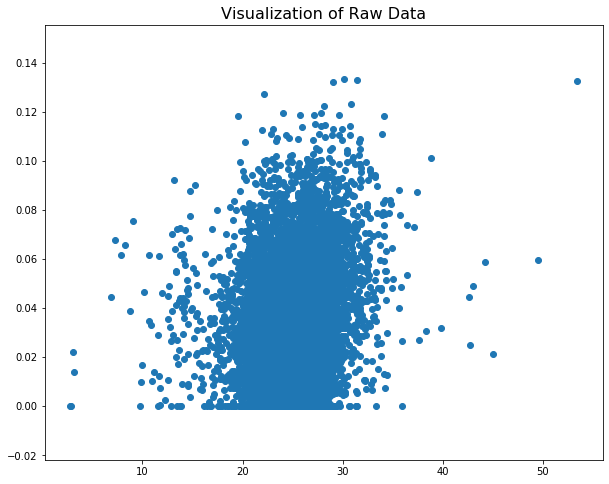

In [2]:
# Select a subset %_value of data
feature_cols = data.drop(columns=["PMC","Detector","Mg_int","Al_int", "Ca_int",
                                  "Ti_int", "Fe_int", "Si_int", "image_i", "image_j"])
print(feature_cols)

features=np.array(feature_cols)
#print("\nArray of Features\n")
#print(features)

# Plot subset %_value
plt.scatter(features[:,2],features[:,1])
plt.gcf().set_size_inches(10,8)
plt.title('Visualization of Raw Data',fontsize=16)

Text(0, 0.5, 'Sum of squared distance')

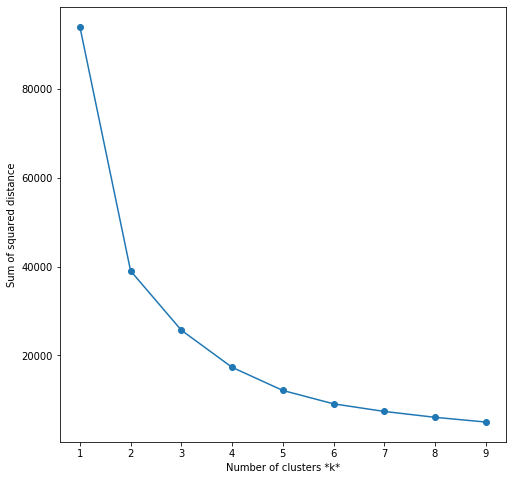

In [17]:
# Elbow Method to find a good k number
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(features)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(8, 8))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [4]:
# Instantiate k-means algorithm
kmeans = KMeans(n_clusters=2)

# Fit the algorithm to the features
kmeans.fit(features)

# Finding the centroid
centroids = kmeans.cluster_centers_

# Compute the silhouette score
kmeans_silhouette = silhouette_score(
features, kmeans.labels_).round(2)

In [5]:
kmeans_silhouette  # between -1 and 1, closer to 1 is more accurate

0.55

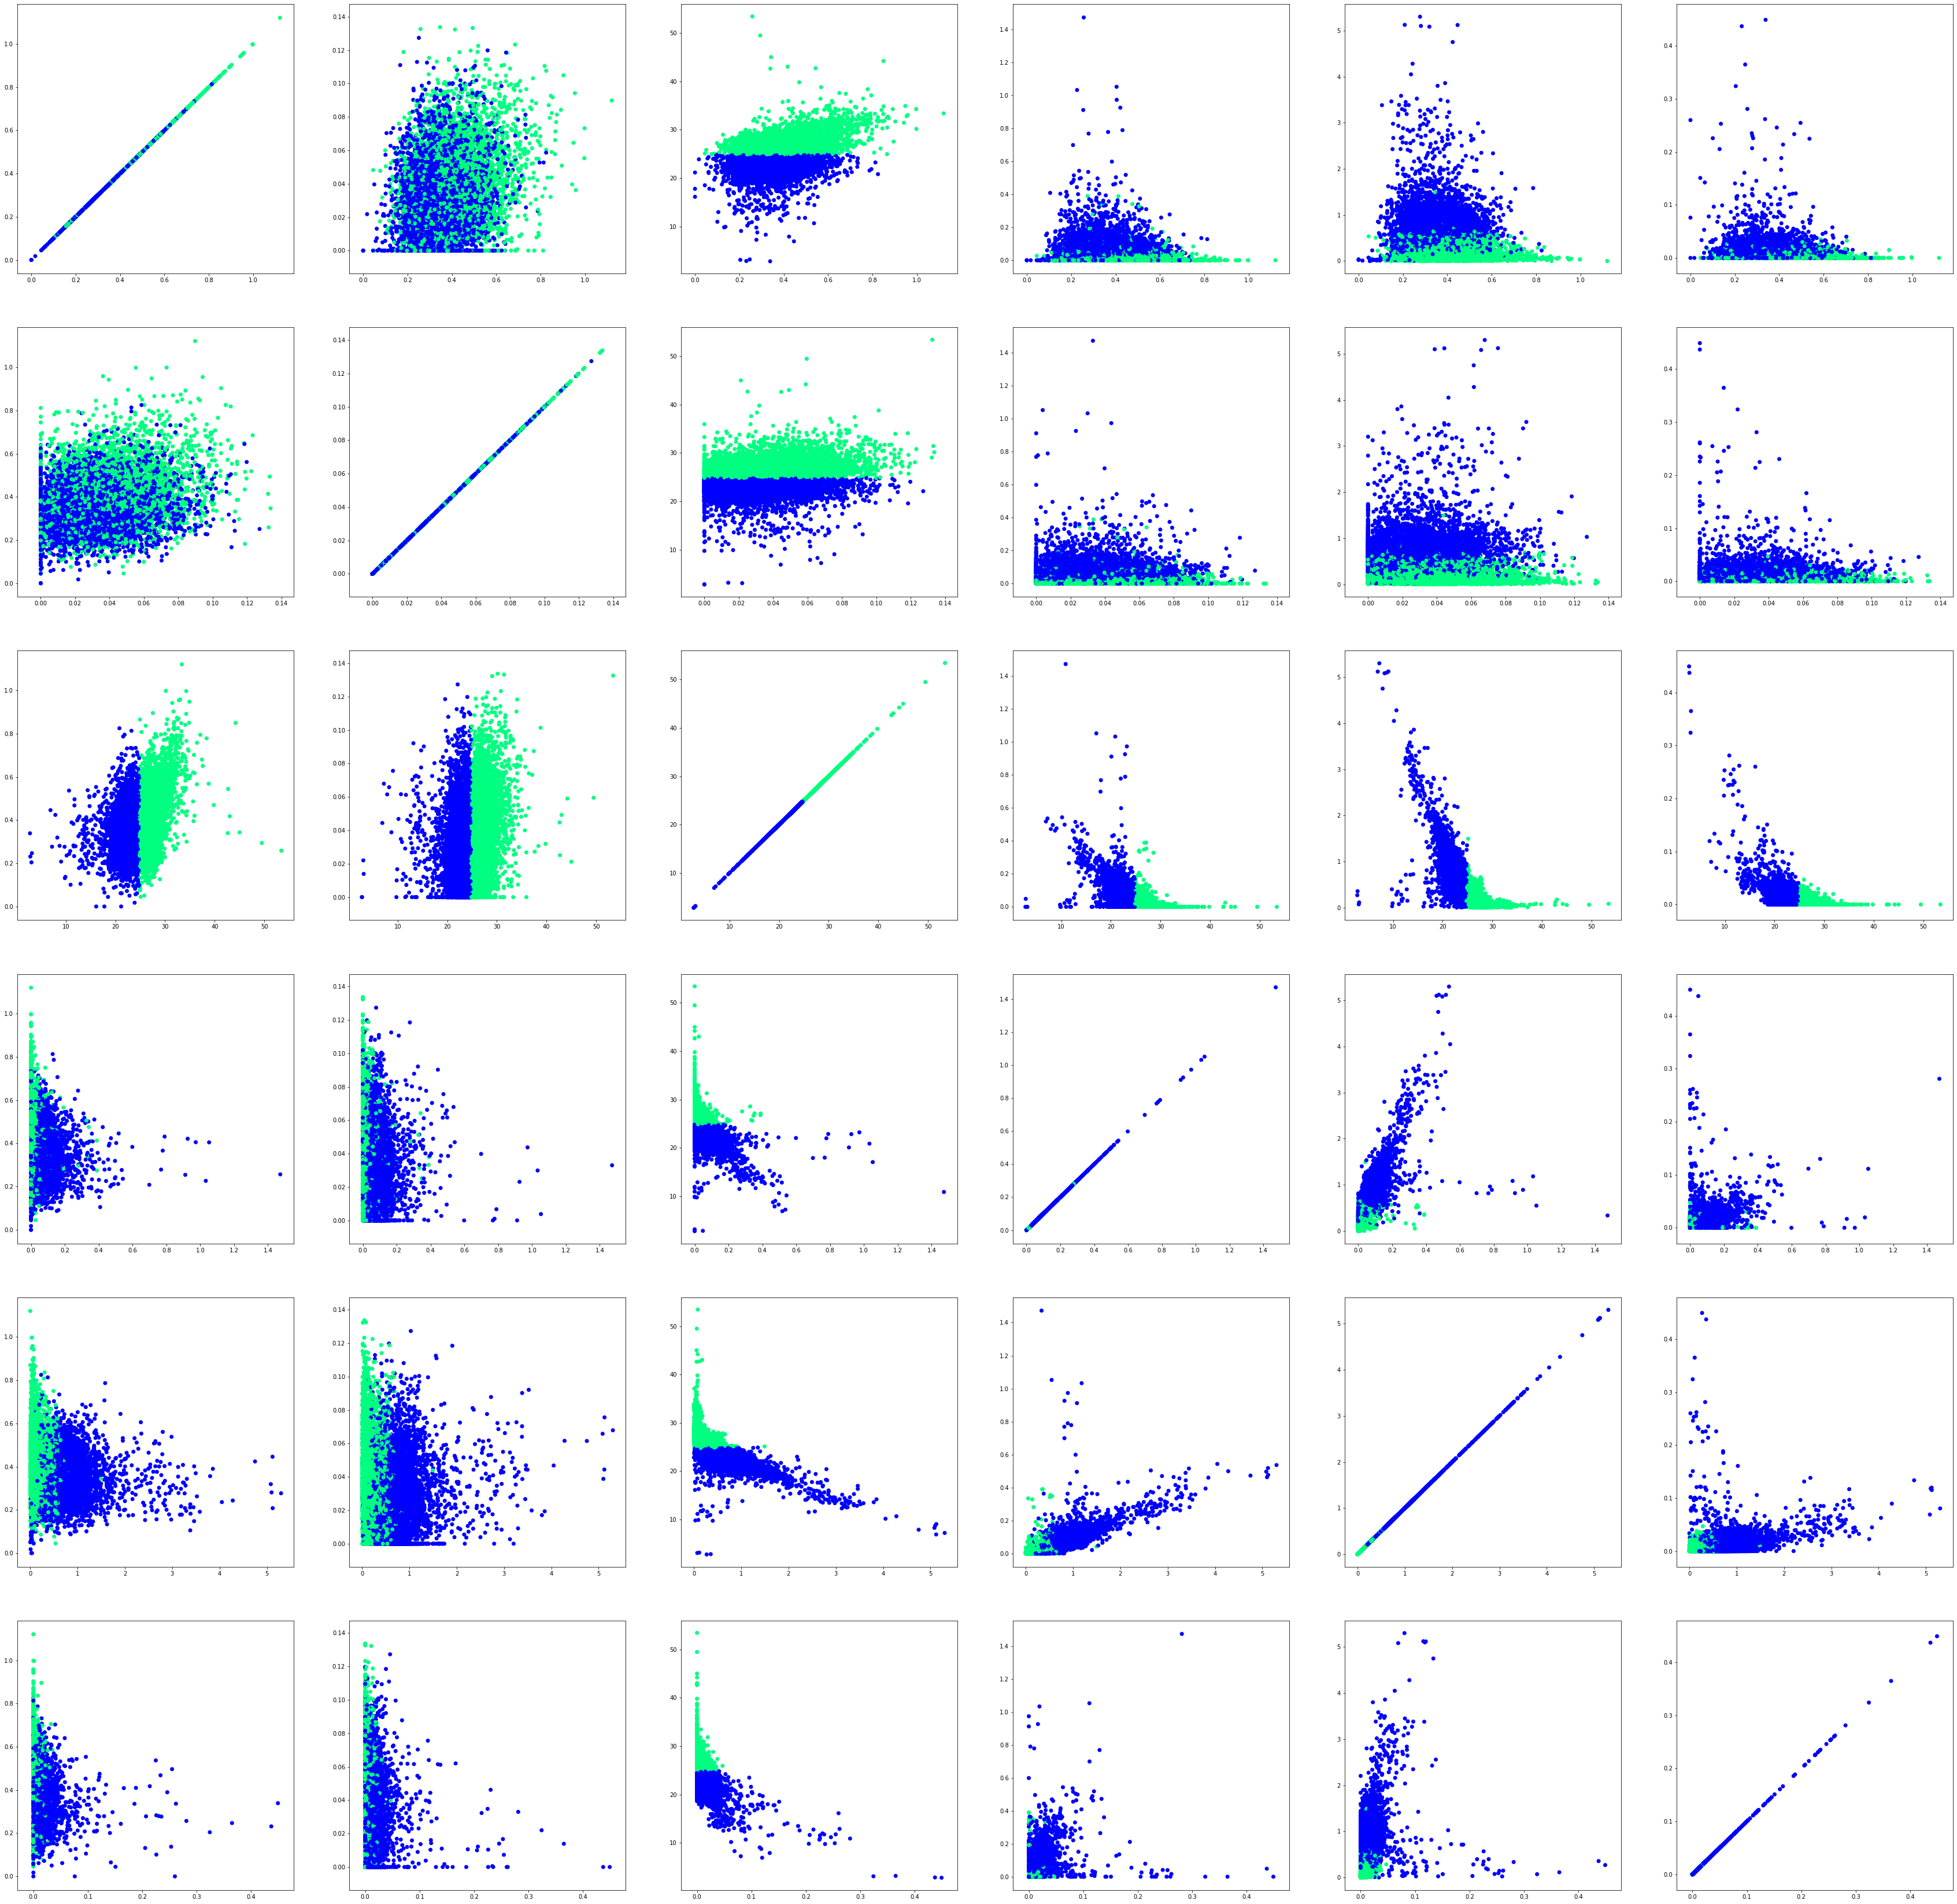

In [6]:

fig,ax = plt.subplots(6,6,figsize=(60,60))
for i in range(6):
    for j in range(6):
        ax[i,j].scatter(features[:,i], features[:,j], c=kmeans.labels_, cmap='winter') 


Text(0, 0.5, 'Al_%')

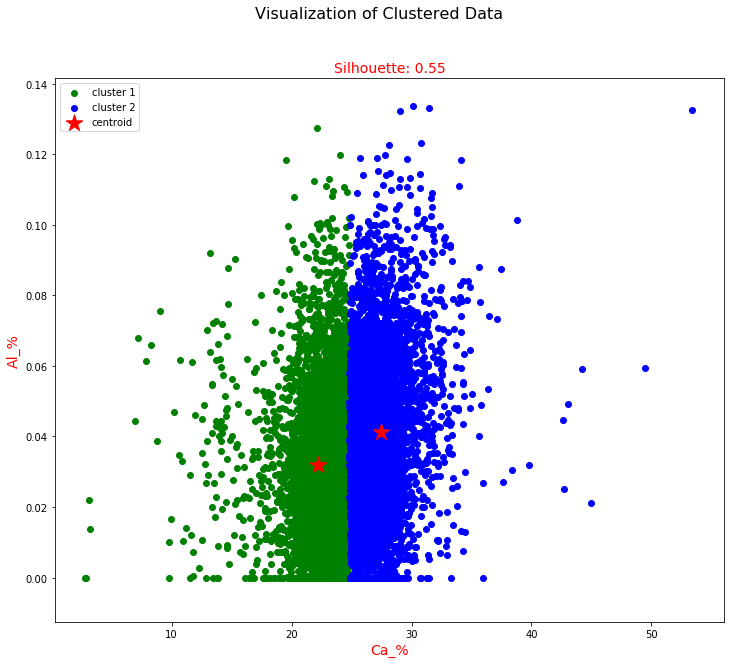

In [7]:
# Plot the clustered data
fig,ax = plt.subplots(1, figsize=(12, 10), sharex=True, sharey=True)
fig.suptitle("Visualization of Clustered Data", fontsize=16)

ax.scatter(features[kmeans.labels_ == 0, 2],
           features[kmeans.labels_ == 0, 1],c='green', label='cluster 1')
ax.scatter(features[kmeans.labels_ == 1, 2], 
           features[kmeans.labels_ == 1, 1],c='blue', label='cluster 2')

ax.scatter(centroids[:, 2], centroids[:, 1], marker='*', s=300,c='r', label='centroid')
ax.legend()
ax.set_title(f"Silhouette: {kmeans_silhouette}", size=14,color='red')
ax.set_xlabel('Ca_%',size=14, color='red')
ax.set_ylabel('Al_%',size=14, color='red')

In [8]:
print(features[kmeans.labels_ == 0,2].max()) # max green cluster x value
print(features[kmeans.labels_ == 1,2].min()) # min blue cluster x value

24.8911
24.7986


In [9]:
cols_name=list(data.columns)[2:8]
print("\nSUM - Min - Max of each column in Clustered data\n")
for i in range(6):
    print(cols_name[i], "\tSum:",round(features[kmeans.labels_ == 0,i].sum(),2),
          "\t Min:", round(features[kmeans.labels_ == 0,i].min(),2),
          "\t Max:", round(features[kmeans.labels_ == 0,i].max(),2),
          "\t Mean:", round(features[kmeans.labels_ == 0,i].mean(),2))


SUM - Min - Max of each column in Clustered data

Mg_% 	Sum: 1359.02 	 Min: 0.0 	 Max: 0.82 	 Mean: 0.35
Al_% 	Sum: 123.98 	 Min: 0.0 	 Max: 0.13 	 Mean: 0.03
Ca_% 	Sum: 86676.75 	 Min: 2.78 	 Max: 24.89 	 Mean: 22.24
Ti_% 	Sum: 315.84 	 Min: 0.0 	 Max: 1.47 	 Mean: 0.08
Fe_% 	Sum: 3231.02 	 Min: 0.0 	 Max: 5.3 	 Mean: 0.83
Si_% 	Sum: 57.92 	 Min: 0.0 	 Max: 0.45 	 Mean: 0.01


In [10]:
print("\n SUM - Min - Max of each column in Raw data\n")
for i in range(6):
    print(cols_name[i], "\tSum:",round(features[:,i].sum(),2),
          "\t Min:", round(features[:,i].min(),2),
          "\t Max:", round(features[:,i].max(),2),
          "\t Mean:", round(features[:,i].mean(),2))


 SUM - Min - Max of each column in Raw data

Mg_% 	Sum: 3095.58 	 Min: 0.0 	 Max: 1.12 	 Mean: 0.38
Al_% 	Sum: 295.38 	 Min: 0.0 	 Max: 0.13 	 Mean: 0.04
Ca_% 	Sum: 200669.84 	 Min: 2.78 	 Max: 53.43 	 Mean: 24.91
Ti_% 	Sum: 366.6 	 Min: 0.0 	 Max: 1.47 	 Mean: 0.05
Fe_% 	Sum: 4014.11 	 Min: 0.0 	 Max: 5.3 	 Mean: 0.5
Si_% 	Sum: 68.81 	 Min: 0.0 	 Max: 0.45 	 Mean: 0.01


# Compare with 4-clusters and 6-clusters models, the 2-clusters model is more acccurate since the Silhouette vlue is closer to 1

In [11]:
# Instantiate k-means algorithm
kmeans2 = KMeans(n_clusters=4)

# Fit the algorithm to the features
kmeans2.fit(features)

# Finding the centroid
centroids2 = kmeans2.cluster_centers_

# Compute the silhouette score
kmeans_silhouette2 = silhouette_score(
features, kmeans2.labels_).round(2)

In [12]:
kmeans_silhouette2

0.51

Text(0, 0.5, 'Al_%')

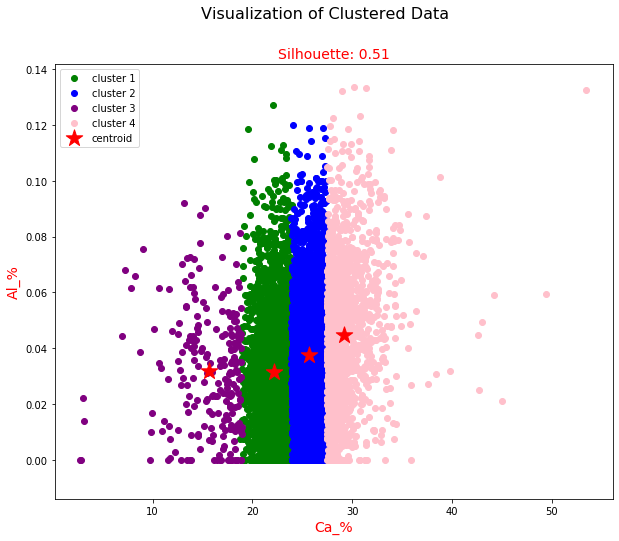

In [13]:
# Plot the clustered data
fig,ax2 = plt.subplots(1, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle("Visualization of Clustered Data", fontsize=16)

ax2.scatter(features[kmeans2.labels_ == 0, 2], features[kmeans2.labels_ == 0, 1],c='green', label='cluster 1')
ax2.scatter(features[kmeans2.labels_ == 1, 2], features[kmeans2.labels_ == 1, 1],c='blue', label='cluster 2')
ax2.scatter(features[kmeans2.labels_ == 2, 2], features[kmeans2.labels_ == 2, 1],c='purple', label='cluster 3')
ax2.scatter(features[kmeans2.labels_ == 3, 2], features[kmeans2.labels_ == 3, 1],c='pink', label='cluster 4')

ax2.scatter(centroids2[:, 2], centroids2[:, 1], marker='*', s=300,c='r', label='centroid')
ax2.legend()
ax2.set_title(f"Silhouette: {kmeans_silhouette2}",size=14,color='red')
ax2.set_xlabel('Ca_%',size=14,color='red')
ax2.set_ylabel('Al_%',size=14,color='red')

Text(0, 0.5, 'Al_%')

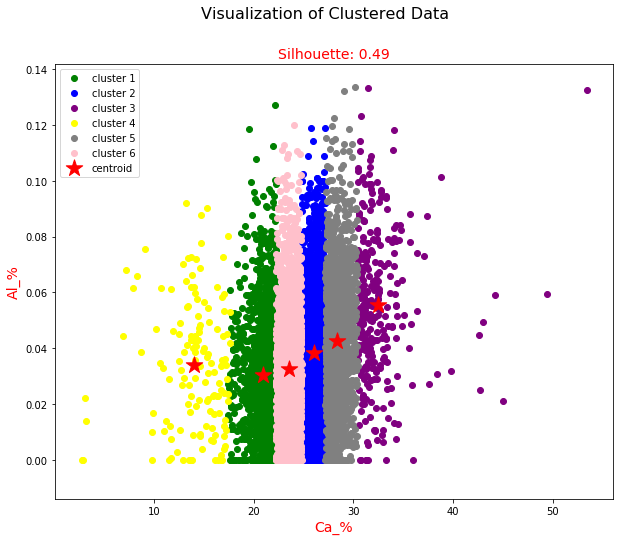

In [14]:
# Instantiate k-means algorithm
kmeans3 = KMeans(n_clusters=6)

# Fit the algorithm to the features
kmeans3.fit(features)

# Finding the centroid
centroids3 = kmeans3.cluster_centers_

# Compute the silhouette score
kmeans_silhouette3 = silhouette_score(
features, kmeans3.labels_).round(2)

# Plot the clustered data
fig,ax3 = plt.subplots(1, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle("Visualization of Clustered Data", fontsize=16)

ax3.scatter(features[kmeans3.labels_ == 0, 2], features[kmeans3.labels_ == 0, 1],c='green', label='cluster 1')
ax3.scatter(features[kmeans3.labels_ == 1, 2], features[kmeans3.labels_ == 1, 1],c='blue', label='cluster 2')
ax3.scatter(features[kmeans3.labels_ == 2, 2], features[kmeans3.labels_ == 2, 1],c='purple', label='cluster 3')
ax3.scatter(features[kmeans3.labels_ == 3, 2], features[kmeans3.labels_ == 3, 1],c='yellow', label='cluster 4')
ax3.scatter(features[kmeans3.labels_ == 4, 2], features[kmeans3.labels_ == 4, 1],c='gray', label='cluster 5')
ax3.scatter(features[kmeans3.labels_ == 5, 2], features[kmeans3.labels_ == 5, 1],c='pink', label='cluster 6')

ax3.scatter(centroids3[:, 2], centroids3[:, 1], marker='*', s=300,c='r', label='centroid')
ax3.legend()
ax3.set_title(f"Silhouette: {kmeans_silhouette3}",size=14,color='red')
ax3.set_xlabel('Ca_%',size=14,color='red')
ax3.set_ylabel('Al_%',size=14,color='red')